<a href="https://colab.research.google.com/github/Ajay176854/Ajay/blob/main/Image_Classifaction_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Convert labels to categorical one-hot encoding
# num_classes = 10 for CIFAR-10
num_classes = 10
train_labels = to_categorical(train_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)

print("CIFAR-10 dataset loaded and preprocessed.")
print(f"Training images shape: {train_images.shape}")
print(f"Training labels shape: {train_labels.shape}")
print(f"Test images shape: {test_images.shape}")
print(f"Test labels shape: {test_labels.shape}")

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
CIFAR-10 dataset loaded and preprocessed.
Training images shape: (50000, 32, 32, 3)
Training labels shape: (50000, 10)
Test images shape: (10000, 32, 32, 3)
Test labels shape: (10000, 10)


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the input shape based on the CIFAR-10 images
# CIFAR-10 images are 32x32 with 3 color channels
input_shape = (32, 32, 3)
num_classes = 10 # CIFAR-10 has 10 classes

# Build the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax') # Output layer with softmax for classification
])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 160,202 (625.79 KB)

 Trainable params: 160,202 (625.79 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
# We will use the preprocessed train_images and train_labels
# And use test_images and test_labels for validation
epochs = 10 # You can adjust the number of epochs
batch_size = 32 # You can adjust the batch size

history = model.fit(
    train_images, train_labels,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(test_images, test_labels)
)

print("Model training completed.")

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 49ms/step - accuracy: 0.3575 - loss: 1.7281 - val_accuracy: 0.5612 - val_loss: 1.2172
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 49ms/step - accuracy: 0.5923 - loss: 1.1534 - val_accuracy: 0.6202 - val_loss: 1.0770
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 75s 48ms/step - accuracy: 0.6615 - loss: 0.9589 - val_accuracy: 0.6172 - val_loss: 1.0948
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 77s 49ms/step - accuracy: 0.7075 - loss: 0.8389 - val_accuracy: 0.6859 - val_loss: 0.9012
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 48ms/step - accuracy: 0.7336 - loss: 0.7552 - val_accuracy: 0.7097 - val_loss: 0.8399
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 77s 49ms/step - accuracy: 0.7641 - loss: 0.6776 - val_accuracy: 0.7121 - val_loss: 0.8391
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 75s 48ms/step - accuracy: 0.7805 - loss: 0.6281 - val_accuracy: 0.7140 - val_loss: 0.8635
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 76s 49ms/step - accuracy: 0.8026 -

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

print("Model compiled successfully.")

Model compiled successfully.


In [ ]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 4s - 12ms/step - accuracy: 0.7211 - loss: 0.8709

Test accuracy: 0.7210999727249146


In [ ]:
import numpy as np

# Make predictions on the first few test images
predictions = model.predict(test_images[:5])

# The predictions are probability distributions over the classes.
# To get the predicted class, we find the index with the highest probability.
predicted_classes = np.argmax(predictions, axis=1)

# Print the predicted classes and the actual labels for comparison
print("Predicted classes:", predicted_classes)
print("Actual labels (one-hot encoded):", test_labels[:5])

# To get the actual class index from the one-hot encoded labels:
actual_classes = np.argmax(test_labels[:5], axis=1)
print("Actual classes:", actual_classes)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Predicted classes: [3 8 8 8 4]
Actual labels (one-hot encoded): [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
Actual classes: [3 8 8 0 6]


In [ ]:
import numpy as np

# Make predictions on the next 5 test images (index 5 to 9)
predictions = model.predict(test_images[5:10])

# Get the predicted class indices
predicted_classes = np.argmax(predictions, axis=1)

# Get the actual class indices from the one-hot encoded labels
actual_classes = np.argmax(test_labels[5:10], axis=1)

# Print the predicted and actual classes for comparison
print("Predicted classes:", predicted_classes)
print("Actual classes:", actual_classes)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Predicted classes: [6 1 6 3 1]
Actual classes: [6 1 6 3 1]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


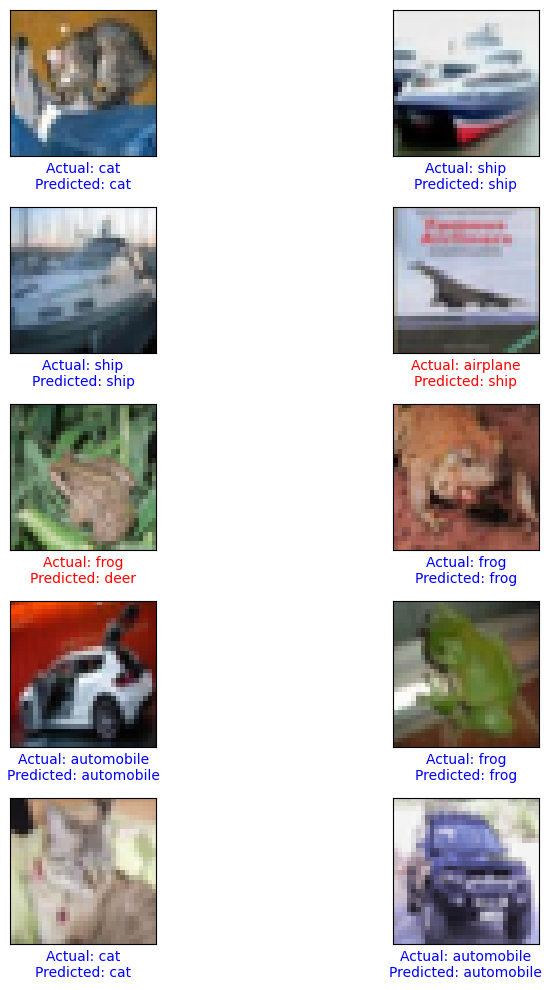

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Get the class names from the CIFAR-10 dataset (assuming the standard order)
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Select a few images to visualize (e.g., the first 10)
num_images_to_show = 10
images_to_show = test_images[:num_images_to_show]
actual_labels_to_show = np.argmax(test_labels[:num_images_to_show], axis=1)

# Get predictions for these images
predictions = model.predict(images_to_show)
predicted_labels_to_show = np.argmax(predictions, axis=1)

# Plot the images with their labels
plt.figure(figsize=(10, 10))
for i in range(num_images_to_show):
    plt.subplot(5, 2, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images_to_show[i])

    actual_label = class_names[actual_labels_to_show[i]]
    predicted_label = class_names[predicted_labels_to_show[i]]

    color = 'blue' if predicted_labels_to_show[i] == actual_labels_to_show[i] else 'red'

    plt.xlabel(f"Actual: {actual_label}\nPredicted: {predicted_label}", color=color)

plt.tight_layout()
plt.show()